# Active Subspaces Example Function: Wing Weight

##### Ryan Howard, CO School of Mines, <ryhoward@mines.edu>
##### Paul Constantine, CO School of Mines, <pconstan@mines.edu>

<br>

In this tutorial, we'll be applying active subspaces to the function

$$
f = 0.036\ S_w^{0.758}W_{fw}^{0.0035}\left(\frac{A}{\cos^2(\Lambda)}\right)^{0.6}q^{0.006}\lambda^{0.04}\left(\frac{100t_c}{\cos(\Lambda)}\right)^{-0.3}(N_zW_{dg})^{0.49}+S_wW_p,
$$

as seen on [http://www.sfu.ca/~ssurjano/wingweight.html](http://www.sfu.ca/~ssurjano/wingweight.html). This function models the weight of a light aircraft wing, and its inputs and their distributions are described in the table below.

Variable|Symbol|Distribution (U(min, max))
:-----|:-----:|:-----
wing area|$S_w$|U(150, 200)
weight of fuel in the wing|$W_{fw}$|U(220, 300)
aspect ratio|$A$|U(6, 10)
quarter-chord sweep|$\Lambda$|U(-10, 10)
dynamic pressure at cruise|$q$|U(16, 45)
taper ratio|$\lambda$|U(0.5, 1)
aerofoil thickness to chord ratio|$t_c$|U(0.08, 0.18)
ultimate load factor|$N_z$|U(2.5, 6)
flight design gross weight|$W_{dg}$|U(1700, 2500)
paint weight|$W_p$|U(0.025, 0.08)

In [1]:
import active_subspaces as ac
import numpy as np
%matplotlib inline

# The wing_functions.py file contains two functions: the wing function (wing(xx))
# and its gradient (wing_grad(xx)). Each takes an Mx10 matrix (M is the number of data
# points) with rows being normalized inputs; wing returns a column vector of function
# values at each row of the input and wing_grad returns a matrix whose ith row is the
# gradient of wing at the ith row of xx with respect to the normalized inputs
from wing_functions import *

First we draw M samples randomly from the input space.

In [2]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
Sw = np.random.uniform(150, 200, (M, 1))
Wfw = np.random.uniform(220, 300, (M, 1))
A = np.random.uniform(6, 10, (M, 1))
L = np.random.uniform(-10, 10, (M, 1))
q = np.random.uniform(16, 45, (M, 1))
l = np.random.uniform(.5, 1, (M, 1))
tc = np.random.uniform(.08, .18, (M, 1))
Nz = np.random.uniform(2.5, 6, (M, 1))
Wdg = np.random.uniform(1700, 2500, (M, 1))
Wp = np.random.uniform(.025, .08, (M, 1))

#the input matrix
x = np.hstack((Sw, Wfw, A, L, q, l, tc, Nz, Wdg, Wp))

Now we normalize the inputs, linearly scaling each to the interval $[-1, 1]$.

In [3]:
#Upper and lower limits for inputs
xl = np.array([150, 220, 6, -10, 16, .5, .08, 2.5, 1700, .025])
xu = np.array([200, 300, 10, 10, 45, 1, .18, 6, 2500, .08])

#XX = normalized input matrix
XX = ac.utils.misc.BoundedNormalizer(xl, xu).normalize(x)

Compute gradients to approximate the matrix on which the active subspace is based.

In [4]:
#output values (f) and gradients (df)
f = wing(XX)
df = wing_grad(XX)

Now we use our data to compute the active subspace.

In [5]:
#Set up our subspace using the gradient samples
ss = ac.subspaces.Subspaces()
ss.compute(df=df, nboot=500)

n should be an integer. Performing conversion.


We use plotting utilities to plot eigenvalues, subspace error, components of the first 2 eigenvectors, and 1D and 2D sufficient summary plots (plots of function values vs. active variable values).

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


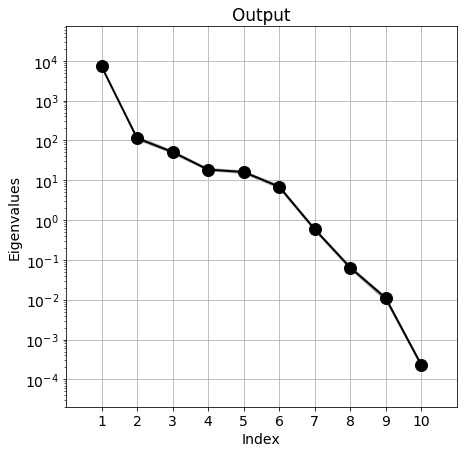

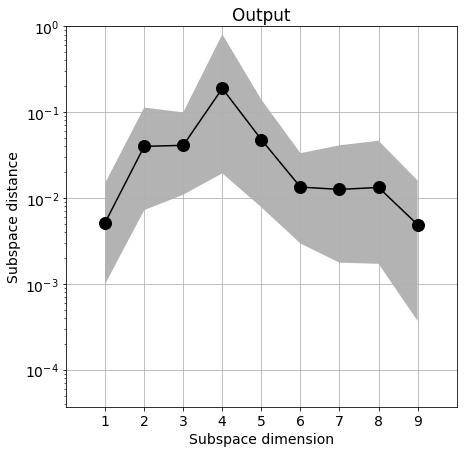

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


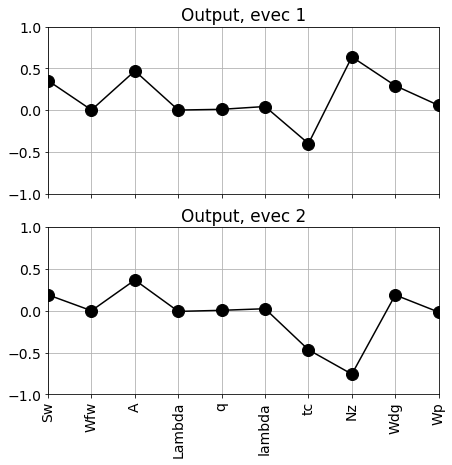

ValueError: c of shape (1000, 1) not acceptable as a color sequence for x with size 1000, y with size 1000

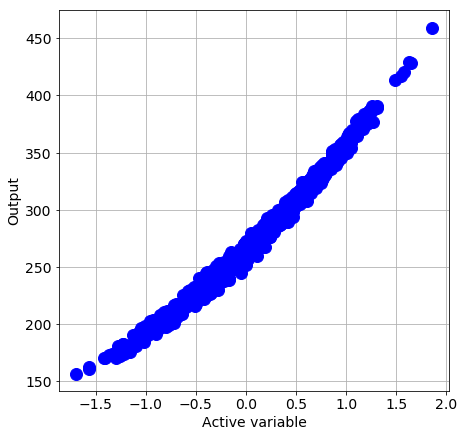

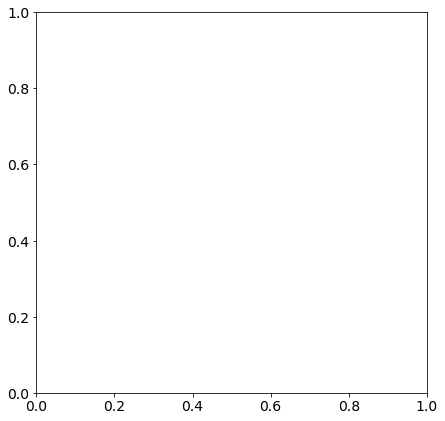

In [6]:
#Component labels
in_labels = ['Sw', 'Wfw', 'A', 'Lambda', 'q', 'lambda', 'tc', 'Nz', 'Wdg', 'Wp']

#plot eigenvalues, subspace errors
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#manually make the subspace 2D for the eigenvector and 2D summary plots
ss.partition(2)
#Compute the active variable values
y = XX.dot(ss.W1)

#Plot eigenvectors, sufficient summaries
ac.utils.plotters.eigenvectors(ss.W1, in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y, f)